# Funcoes necessarias para o trabalho


In [ ]:
def plot_category_count( category:pd.Series, )

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from ast import literal_eval
from pandas import json_normalize
import warnings

warnings.filterwarnings("ignore")

/Users/chenyenpin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [64]:
def plot_category_count( category:pd.Series,figsize=(16,8)):
    fig, ax= plt.subplots(figsize=figsize)
    ax.barh(category.index, category.values)
    ax.grid(True, linestyle="--")
    ax.set_xlabel("Count")
    return fig, ax

# Importando datasets

In [4]:
#importando df
df_anime=pd.read_csv("/Users/chenyenpin/Documents/RECOMMENDER+STREAMLIT/dataframes/animes.csv")
df_profile=pd.read_csv('/Users/chenyenpin/Documents/RECOMMENDER+STREAMLIT/dataframes/profiles.csv')
df_review=pd.read_csv("/Users/chenyenpin/Documents/RECOMMENDER+STREAMLIT/dataframes/reviews.csv")

In [3]:
df_anime.head(1)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...


In [15]:
df_profile.head(1)

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche


In [16]:
df_review.head(1)

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938


### Data Wrangling e Data Cleaning

In [5]:
#merge all 3 datasets
df=df_profile.merge(df_review, how='left', on="profile" )
df_all=df_anime.merge(df, on="uid", how="left")

### Recebendo dataset novo df_rec= dataframe recomendacao

In [49]:
#retirando colunas nao importantes -agora-
columns=[
    'uid', 
    'title', 
    'anime_uid',
    #'synopsis', 
    'genre', 
    'aired', 
    #'episodes', 
    'members',  
    #'popularity',  
    #'ranked', 
    #'score_x', 
    #'img_url', 
    #'link', 
    #'profile',
    #'gender', 
    #'birthday', 
    'favorites_anime', 
    #'link_x', 
    #'text',
    'score_y', 
    'scores', 
    #'link_y'
       ]
'''
novo dataset criado que vai ser usado como datset de recomendacao

'''

df_rec=df_all[columns]



In [50]:
df_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42181 entries, 0 to 42180
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              42181 non-null  int64  
 1   title            42181 non-null  object 
 2   anime_uid        31738 non-null  float64
 3   genre            42181 non-null  object 
 4   aired            42181 non-null  object 
 5   members          42181 non-null  int64  
 6   favorites_anime  31738 non-null  object 
 7   score_y          31738 non-null  float64
 8   scores           31738 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.9+ MB


In [51]:
# criando coluna nova  pois exisitam muitos valores faltantes para ANIME UID
df_rec["id_anime"]=LabelEncoder().fit_transform(df_rec["anime_uid"])

In [52]:
df_rec.id_anime

0        1945
1        1679
2        1679
3        1679
4        1679
         ... 
42176     208
42177     208
42178     208
42179     208
42180     208
Name: id_anime, Length: 42181, dtype: int64

In [53]:
df_rec[df_rec.duplicated()]

,uid,title,anime_uid,genre,aired,members,favorites_anime,score_y,scores,id_anime
2,23273,Shigatsu wa Kimi no Uso,6811.0,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",995473,"['12531', '11843', '11771', '457', '249']",10.0,"{'Overall': '10', 'Story': '9', 'Animation': '...",1679
3,23273,Shigatsu wa Kimi no Uso,6811.0,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",995473,"['12531', '11843', '11771', '457', '249']",10.0,"{'Overall': '10', 'Story': '9', 'Animation': '...",1679
4,23273,Shigatsu wa Kimi no Uso,6811.0,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",995473,"['12531', '11843', '11771', '457', '249']",10.0,"{'Overall': '10', 'Story': '9', 'Animation': '...",1679
5,23273,Shigatsu wa Kimi no Uso,6811.0,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",995473,"['12531', '11843', '11771', '457', '249']",10.0,"{'Overall': '10', 'Story': '9', 'Animation': '...",1679
6,23273,Shigatsu wa Kimi no Uso,6811.0,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",995473,"['12531', '11843', '11771', '457', '249']",10.0,"{'Overall': '10', 'Story': '9', 'Animation': '...",1679
...,...,...,...,...,...,...,...,...,...,...
42176,87,Mobile Suit Gundam: Char's Counterattack,267.0,"['Military', 'Sci-Fi', 'Space', 'Drama', 'Mecha']","Mar 12, 1988",29248,"['1604', '5114', '3092', '853', '1579']",10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",208
42177,87,Mobile Suit Gundam: Char's Counterattack,267.0,"['Military', 'Sci-Fi', 'Space', 'Drama', 'Mecha']","Mar 12, 1988",29248,"['1604', '5114', '3092', '853', '1579']",10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",208
42178,87,Mobile Suit Gundam: Char's Counterattack,267.0,"['Military', 'Sci-Fi', 'Space', 'Drama', 'Mecha']","Mar 12, 1988",29248,"['1604', '5114', '3092', '853', '1579']",10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",208
42179,87,Mobile Suit Gundam: Char's Counterattack,267.0,"['Military', 'Sci-Fi', 'Space', 'Drama', 'Mecha']","Mar 12, 1988",29248,"['1604', '5114', '3092', '853', '1579']",10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",208


In [54]:
#dropando as as linhas repetidas
df_rec=df_rec.drop_duplicates(keep="first", ignore_index=True)
df_rec=df_rec.drop(columns="anime_uid")

In [55]:
df_rec.shape

(16356, 9)

In [56]:
df_rec.isna().sum()

uid                   0
title                 0
genre                 0
aired                 0
members               0
favorites_anime    8830
score_y            8830
scores             8830
id_anime              0
dtype: int64

In [57]:
#trasnformando meu genero em lista
df_rec["genre"]=df_rec["genre"].apply(literal_eval)

In [58]:
#transformando minha coluna de scores (json em colunas isoladas)
df_rec["scores"]=df_rec["scores"].fillna("{}")
df_rec["scores"]=df_rec["scores"].apply(eval)
df_normalized=json_normalize(df_rec['scores'])
df_normalized=df_normalized.reset_index()
df_normalized


,index,Overall,Story,Animation,Sound,Character,Enjoyment
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10,9,9,10,9,10
2,2,10,10,10,10,10,10
3,3,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6,7,8,8,5,6
...,...,...,...,...,...,...,...
16351,16351,8,7,8,7,8,0
16352,16352,10,10,10,9,10,10
16353,16353,10,8,10,10,9,10
16354,16354,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_rec=df_rec.reset_index()
#unindo os datasets

df_rec=df_rec.merge(df_normalized, how="left", left_index=True, right_index=True)
#dropando colunas extras criadas

df_rec.drop(columns=['index_y',"index_x","scores"],inplace=True)

df_rec.columns=['user_id', 'title', 'genre', 'aired', 'members', 'favorites_anime',
       'score', 'id_anime', 'overall', 'story', 'animation', 'Sound',
       'character', 'enjoyment']

In [69]:
#renomeando colunas
df_rec.columns=['user_id', 'title', 'genre', 'aired', 'members', 'favorites_anime',
       'rating', 'id_anime', 'overall', 'story', 'animation', 'Sound',
       'character', 'enjoyment']

In [66]:
df_rec.favorites_anime

0                                              NaN
1        ['12531', '11843', '11771', '457', '249']
2                 ['4224', '355', '6', '1', '934']
3                                              NaN
4                         ['6213', '424', '10588']
                           ...                    
16351                 ['857', '3731', '53', '269']
16352      ['811', '1735', '2167', '9513', '9919']
16353         ['21', '30', '1210', '1535', '1575']
16354                                          NaN
16355         ['957', '5835', '4898', '136', '17']
Name: favorites_anime, Length: 16356, dtype: object

In [72]:
rating=(df_rec.groupby("rating").
        count()["user_id"]
        .sort_values(ascending=False))

rating

rating
10.0    1774
9.0     1669
8.0     1391
7.0     1073
6.0      609
5.0      388
4.0      212
3.0      208
2.0      118
1.0       84
Name: user_id, dtype: int64

In [86]:
def normalize(columns:pd.Series):
    if df[columns]==1 | df[columns]==2:
        return 1
    elif  df[columns]==3 | df[columns]==4:
        return 2
    elif  df[columns]==5 | df[columns]==6:
        return 3
    elif  df[columns]==7 | df[columns]==8:
        return 4
    elif df[columns]==NaN:
        return None
    else:
        return 5


In [87]:
df_rec["rating"].apply(normalize)

KeyError: nan

(<Figure size 1600x800 with 1 Axes>, <AxesSubplot:xlabel='Count'>)

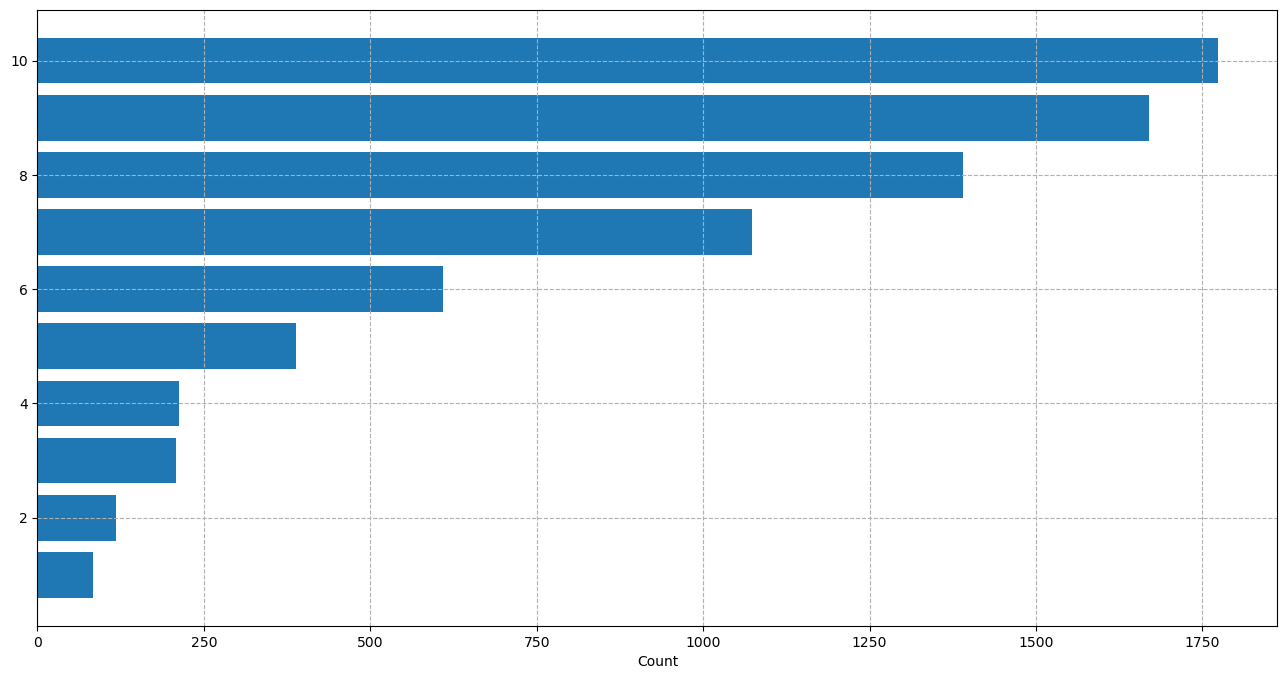

In [73]:
plot_category_count(rating)

In [ ]:
genres=(df_rec
        .explode("genre")
        .groupby("genre")
        .count()["id_anime"]
        .head(20)
        .sort_values(ascending=False)
        )

genres

genre
Comedy          5683
Action          3618
Fantasy         3011
Adventure       2770
Drama           2488
Kids            2460
Hentai          1316
Mecha           1066
Historical      1066
Magic           1026
Ecchi            746
Military         553
Demons           463
Horror           438
Dementia         403
Harem            378
Martial Arts     374
Game             353
Cars             118
Josei             93
Name: id_anime, dtype: int64

<AxesSubplot:ylabel='genre'>

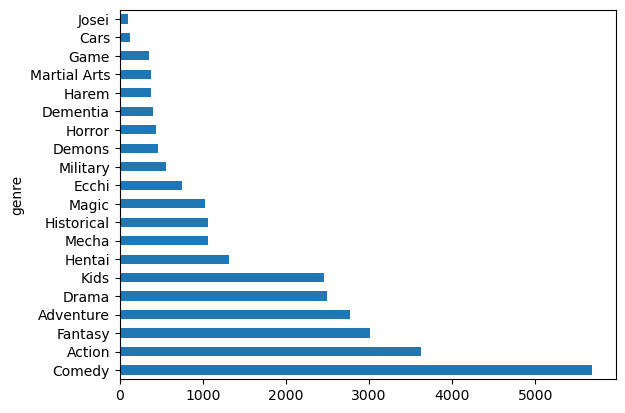

In [ ]:
genres.plot(kind="barh")

# Esparcidade

In [156]:
n_user=df_rec["uid"].nunique()
n_itens=df_rec["id_anime"].nunique()
n_rating=df_all[["uid","anime_uid"]].drop_duplicates().shape[0]

In [157]:
print(f"USER: {n_user}")
print(f"Itens: {n_itens}")
print(f"rating: {n_rating}")

USER: 16216
Itens: 1946
rating: 16216


In [158]:
overral_sparcity= 1-n_rating/(n_user*n_itens)

print("overall sparcity:{:.02f}%".format(100*overral_sparcity))

overall sparcity:99.95%


In [165]:
df_rec.duplicated().any()

False

In [173]:
df_rec=df_rec.drop_duplicates(subset='uid', keep="first")

In [185]:
df_rec1=df_rec

In [190]:

df_rec['genre'] = df_rec['genre'].apply(literal_eval)

In [205]:
genres=(df_rec
        .explode("genre")
        .groupby("genre")
        .count()["id_anime"]
        .head(20)
        .sort_values(ascending=False)
        )

genres

genre
Comedy          5640
Action          3572
Fantasy         2971
Adventure       2753
Kids            2458
Drama           2457
Hentai          1295
Mecha           1060
Historical      1051
Magic           1013
Ecchi            740
Military         541
Demons           453
Horror           434
Dementia         402
Harem            374
Martial Arts     367
Game             348
Cars             117
Josei             93
Name: id_anime, dtype: int64

In [16]:
#dropando a a linha repetida apena no UID para pivotar 
df_rec=df_rec.drop_duplicates(subset='uid', keep="first")

In [17]:
df_rec[df_rec.duplicated(subset='uid', keep=False)]

,uid,title,genre,aired,popularity,score_y,id_anime


In [174]:
df_rec.pivot(
    index="uid",
    columns="id_anime",
    values="score_y"
)

id_anime,0,1,2,3,4,5,6,7,8,9,...,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945
uid,,,,,,,,,,,,,,,,,,,,,
1,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
# preenchendo a matriz esparca com 0
df_preference=df_rec.pivot(
        index="uid",
        columns="id_anime",
        values="score_y"
)
df_preference.fillna(0)

id_anime,0,1,2,3,4,5,6,7,8,9,...,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945
uid,,,,,,,,,,,,,,,,,,,,,
1,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
df_rec[df_rec.title=="Haikyuu!! Second Season"]

,uid,title,genre,aired,popularity,score_x,score_y,id_anime
0,28891,Haikyuu!! Second Season,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",141,8.82,NaN,1945


In [70]:
df_all[["aire1","aired2"]]=df_all["aired"].str.split("to", expand=True)

In [74]:
df_all.scores.unique().tolist()

[nan,
 "{'Overall': '10', 'Story': '9', 'Animation': '9', 'Sound': '10', 'Character': '9', 'Enjoyment': '10'}",
 "{'Overall': '10', 'Story': '10', 'Animation': '10', 'Sound': '10', 'Character': '10', 'Enjoyment': '10'}",
 "{'Overall': '6', 'Story': '7', 'Animation': '8', 'Sound': '8', 'Character': '5', 'Enjoyment': '6'}",
 "{'Overall': '8', 'Story': '8', 'Animation': '9', 'Sound': '9', 'Character': '8', 'Enjoyment': '8'}",
 "{'Overall': '9', 'Story': '5', 'Animation': '7', 'Sound': '7', 'Character': '9', 'Enjoyment': '10'}",
 "{'Overall': '9', 'Story': '10', 'Animation': '9', 'Sound': '8', 'Character': '9', 'Enjoyment': '7'}",
 "{'Overall': '9', 'Story': '10', 'Animation': '10', 'Sound': '10', 'Character': '10', 'Enjoyment': '8'}",
 "{'Overall': '7', 'Story': '8', 'Animation': '8', 'Sound': '7', 'Character': '7', 'Enjoyment': '7'}",
 "{'Overall': '9', 'Story': '9', 'Animation': '8', 'Sound': '8', 'Character': '9', 'Enjoyment': '9'}",
 "{'Overall': '10', 'Story': '7', 'Animation': '6', 

In [71]:
df_all

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_x,...,link_x,anime_uid,text,score_y,scores,link_y,aired_list,aired1,aired2,aire1
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"[['Comedy', 'Sports', 'Drama', 'School', 'Shou...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,NaN,NaN,NaN,NaN,NaN,NaN,"[Oct 4, 2015 , Mar 27, 2016]",0,"Mar 27, 2016","Oct 4, 2015"
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[['Drama', 'Music', 'Romance', 'School', 'Shou...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,https://myanimelist.net/profile/itaeon,6811.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=23273,"[Oct 10, 2014 , Mar 20, 2015]",0,"Mar 20, 2015","Oct 10, 2014"
2,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[['Drama', 'Music', 'Romance', 'School', 'Shou...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,https://myanimelist.net/profile/itaeon,6811.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=23273,"[Oct 10, 2014 , Mar 20, 2015]",0,"Mar 20, 2015","Oct 10, 2014"
3,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[['Drama', 'Music', 'Romance', 'School', 'Shou...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,https://myanimelist.net/profile/itaeon,6811.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=23273,"[Oct 10, 2014 , Mar 20, 2015]",0,"Mar 20, 2015","Oct 10, 2014"
4,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[['Drama', 'Music', 'Romance', 'School', 'Shou...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,https://myanimelist.net/profile/itaeon,6811.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=23273,"[Oct 10, 2014 , Mar 20, 2015]",0,"Mar 20, 2015","Oct 10, 2014"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42176,87,Mobile Suit Gundam: Char's Counterattack,The year is Universal Century 0093. Char Aznab...,"[['Military', 'Sci-Fi', 'Space', 'Drama', 'Mec...","Mar 12, 1988",1.0,29248,2604,1081.0,7.73,...,https://myanimelist.net/profile/ivorykeys,267.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=87,"[Mar 12, 1988]",0,None,"Mar 12, 1988"
42177,87,Mobile Suit Gundam: Char's Counterattack,The year is Universal Century 0093. Char Aznab...,"[['Military', 'Sci-Fi', 'Space', 'Drama', 'Mec...","Mar 12, 1988",1.0,29248,2604,1081.0,7.73,...,https://myanimelist.net/profile/ivorykeys,267.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=87,"[Mar 12, 1988]",0,None,"Mar 12, 1988"
42178,87,Mobile Suit Gundam: Char's Counterattack,The year is Universal Century 0093. Char Aznab...,"[['Military', 'Sci-Fi', 'Space', 'Drama', 'Mec...","Mar 12, 1988",1.0,29248,2604,1081.0,7.73,...,https://myanimelist.net/profile/ivorykeys,267.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=87,"[Mar 12, 1988]",0,None,"Mar 12, 1988"
42179,87,Mobile Suit Gundam: Char's Counterattack,The year is Universal Century 0093. Char Aznab...,"[['Military', 'Sci-Fi', 'Space', 'Drama', 'Mec...","Mar 12, 1988",1.0,29248,2604,1081.0,7.73,...,https://myanimelist.net/profile/ivorykeys,267.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=87,"[Mar 12, 1988]",0,None,"Mar 12, 1988"


In [70]:
#dropando os duplicados
df_all=df_all.drop_duplicates(keep="first")

In [71]:
df_all.duplicated().sum()

0

In [ ]:
def convert_to_list(columns:str, separator=","):
    return columns.split(separator)